# Red FeedForward

Las redes FeedForward son quizá el tipo más común de red neuronal. Éstas consisten en una generalización del perceptrón; son redes que toman una entrada y aplican varias capas ocultas para obtener una salida adecuada. Las capas ocultas transforman los datos para poder encontrar una separación lineal y poder realizar tareas de clasificación.

A continuación, mostramos la aplicación de una red FeedForward a un problema sencillo de clasificación. Para optimizar los pesos de la red, acudimos al algoritmo de <b>Gradiente descendiente</b> implementado con <b>Backpropagation</b>.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Preparación de los datos

Los datos que utilizaremos corresponde a un problema de clasificación binaria entre las clases "gato" (1) y "no gato" (0). Los vectores de entrada serán vectores de 7 dimensiones, donde cada dimensión representa una variable aleatoria binaria.

In [2]:
data = pd.read_csv('cat_data.csv')
data

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?
0,1,1,1,1,1,1,1,1
1,0,0,0,1,0,1,0,0
2,1,0,1,1,0,1,1,0
3,1,1,0,1,1,0,1,0
4,1,1,1,0,1,0,1,0
5,1,1,1,1,0,0,0,1
6,1,0,0,1,1,1,0,0
7,1,1,1,1,0,0,1,1
8,1,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0


Separaremos los vectores de entrada $X$, que guardaremos como los renglones de una matriz, de las clases que queremos obtener $Y$ que serán las entradas de un vector. 

En este ejemplo de juguete ocuparemos todos los datos para entrenar la red, pero debemos recordar que en una aplicación real estos datos deben separarse en entrenamiento y evaluación.

In [3]:
#Convertir los datos a numpy
npData = data.to_numpy()
#Ejemplos
X = npData[:,:-1]
#Clases de los ejemplos
Y = npData[:,-1]

#Tamaño de los datos
#Unidades de entrada
m,n = X.shape

## Entrenamiento de la red

Como hemos señalado, para entrenar la red utilizaremos el método de (batch) gradiente descendiente. Para obtener las derivadas sobre los pesos aplicaremos backpropagation. 

Eligiremos los hiperparámetros: nuestra red contará con una sola capa oculta con dos unidades ocultas y activación $\tanh$. Escogeremos un número máximo de iteraciones, un rango de aprendizaje, y además usaremos la regularización de Tychonoff.

Inicializaremos los pesos de forma aleatoria.

In [4]:
np.random.seed(0)

#HIPERPARÁMETROS
#Número de dimensiones
h_dim = 2
#Rango de aprendizaje
l = 0.01
#Regularización
reg = 0.2
#Número máximo de iteraciones
max_it = 1000

#Inicialización de parámetros de la red
w1 = np.random.rand(n,h_dim)/np.sqrt(n)
b1 = np.ones(h_dim)
w2 = np.random.rand(h_dim,2)/np.sqrt(h_dim)
b2 = np.ones(2)

El entrenamiento se divide en dos fases:

* Forward: como hemos elegido el método de batch, tomaremos todos los ejemplos y calcularemos las salida sobre todos estos. Nuestra función de salida será la Softmax.
* Backward: calcularemos todas las variables del método de backpropagation que después utilizaremos para obtener las derivadas y actualizar los pesos.

El algoritmo terminará o bien cuando se haga una clasificación correcta o cuando se sobrepase el número máximo de iteraciones.

In [5]:
t=0 #Primera iteración
stop = False #Condición de paro
while  stop == False:
    #FORWARD
    #Pre-activación capa oculta
    a = np.dot(X,w1) + b1
    #Activación capa oculta
    h = np.tanh(a)
    #Pre-activación capa de salida
    out = np.dot(h,w2)+b2
    #Función softmax
    exp = np.exp( out) #Resta del máximo
    f = exp/exp.sum(1, keepdims=True)
    
    #BACKPROP
    #Variable de capa de salida
    d_out = exp/exp.sum(1, keepdims=True)
    d_out[range(m),Y] -= 1
    #Variable de capa oculta
    d_h = (1-h**2)*np.dot(d_out,w2.T)
    
    #Derivada sobre w2
    dw2 = np.dot(h.T,d_out)
    #Derivada sobre b2
    db2 = d_out.sum(0)
    #Derivada sobre w1    
    dw1 = np.dot(X.T,d_h)
    #Derivada sobre b1
    db1 = d_h.sum(0)
    #Derivada regularización
    dw2 += reg*w2
    dw1 += reg*w1
    
    #Actualización de pesos
    w2 -= l*dw2
    b2 -= l*db2
    w1 -= l*dw1
    b1 -= l*db1
    
    #Cálculo de errores cometidos
    error = ((np.argmax(f, axis=1)-Y)**2).sum(0)
    if t%10 == 0: 
        print('Época', t, '\t Error', error, '\t Entropy', -np.log(f[range(m),Y]).sum(0))
    
    #Aumenta la iteración
    t += 1
    #Condición de paro
    if error == 0 or t == max_it:
        stop = True
        print('Época', t, '\t Error', error, '\t Entropy', -np.log(f[range(m),Y]).sum(0))

Época 0 	 Error 9 	 Entropy 11.285956391735523
Época 10 	 Error 5 	 Entropy 9.171032843720772
Época 20 	 Error 5 	 Entropy 9.137110693561763
Época 30 	 Error 5 	 Entropy 9.132363856993603
Época 40 	 Error 5 	 Entropy 9.128200545403368
Época 50 	 Error 5 	 Entropy 9.124060389443006
Época 60 	 Error 5 	 Entropy 9.119894231018531
Época 70 	 Error 5 	 Entropy 9.115665322482895
Época 80 	 Error 5 	 Entropy 9.11133499225059
Época 90 	 Error 5 	 Entropy 9.106860539205776
Época 100 	 Error 5 	 Entropy 9.102193524104806
Época 110 	 Error 5 	 Entropy 9.097277734834641
Época 120 	 Error 5 	 Entropy 9.092046603842078
Época 130 	 Error 5 	 Entropy 9.08641983545956
Época 140 	 Error 5 	 Entropy 9.080298899111433
Época 150 	 Error 5 	 Entropy 9.073560878089216
Época 160 	 Error 5 	 Entropy 9.066049898811558
Época 170 	 Error 5 	 Entropy 9.057564936940697
Época 180 	 Error 5 	 Entropy 9.047842088388242
Época 190 	 Error 5 	 Entropy 9.036528195843287
Época 200 	 Error 5 	 Entropy 9.02314065054007
Época

### Exploración de los pesos aprendidos

#### Capa oculta

Como señalamos, lo que hacen las capas ocultas es tranformar los datos de tal forma que el nuevo espacio (donde los datos están tranformados) pueda encontrarse un separador lineal. Como sólo hemos elegido dos unidades ocultas, podremos visualizar los datos en un espacio de dos dimensiones. Se podrá observar que aquí, se pueden separar los datos por una recta.

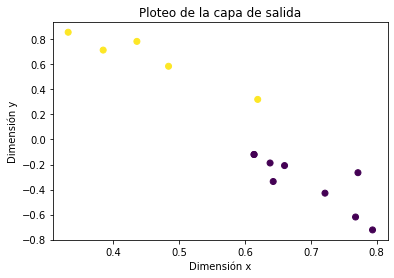

In [6]:
#Aplicación de la capa oculta
T = np.tanh(np.dot(X,w1)+b1)

#Ploteo de los datos transformados
plt.scatter(T[:,0],T[:,1],c=Y)
plt.title('Ploteo de la capa de salida')
plt.xlabel('Dimensión x')
plt.ylabel('Dimensión y')
plt.show()

Lo que este nuevo espacio codifica es muchas veces muy dificil de interpretar, principalmente cuando se utilizan varias capas ocultas. En estos casos, las codificaciones de las capas ocultas son abstractas y, por tanto, no es fácil decir qué está aprendiendo la red. Cuando esto pasa, se habla de <b>deep learning</b>.

Afortunadamente, hemos elegido un ejemplo sencillo y una arquitectura neuronal sencilla, por lo que podemos, hasta cierto punto, interpretar lo que la red ha aprendido. Para visualizar la codificación que se hace, hacemos un mapa de los pesos en la capa oculta.

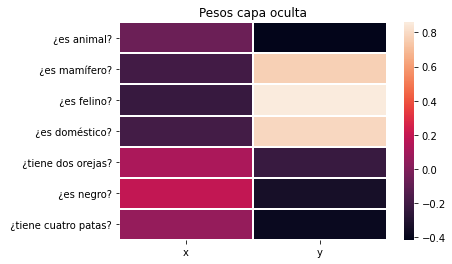

In [7]:
#visualización de pesos en la capa oculta
ax = sns.heatmap(w1, linewidth=1.0, xticklabels=['x','y'],yticklabels=list(data.columns)[:-1])
ax.set_title('Pesos capa oculta')
plt.show()

In [8]:
#Valores de los pesos de las conexiones en capa oculta
pd.DataFrame(w1.T, columns=list(data.columns)[:-1], index=['x','y'])

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?
x,-0.065426,-0.191771,-0.227040,-0.186993,0.122683,0.195967,0.061042
y,-0.415318,0.768389,0.859388,0.789813,-0.225289,-0.337790,-0.383977


#### Capa de salida

La capa de salida nos muestra valores probabilísticos de las clases dado los valores de entrada. A partir de estos, podemos hacer una clasificación como:

$$\hat{y} = \arg\max_y p(Y=y|X=x)$$

Para explorar lo que hace la capa de salida podemos visualizar los pesos en esta capa como hicimos con la capa oculta:

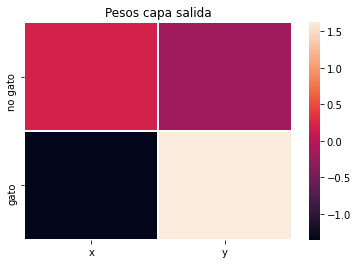

In [9]:
#Visualización de los pesos en la capa de salida
ax = sns.heatmap(w2, linewidth=1.0, xticklabels=['x','y'],yticklabels=['no gato', 'gato'])
ax.set_title('Pesos capa salida')
plt.show()

In [14]:
#Valores de los pesos en la capa de salida
pd.DataFrame(w2, index=['no gato', 'gato'], columns=['x','y'])

,x,y
no gato,0.212482,-0.162968
gato,-1.352188,1.619170


Como hemos señalado, la red neuronal puede considerarse un estimador estadístico que determina la probabilidad de una clase dado un vector de rasgos de entrada. Podemos visualizar cuáles son las probabilidades que la red estima para cada ejemplo:

In [11]:
#Obtención de probabilidades
dot = np.dot(T,w2)+b2
dotExp = np.exp(dot)
probs = dotExp/dotExp.sum(1, keepdims=True)
#Probabilidad de las clases
pd.DataFrame(np.concatenate((probs,Y.reshape(14,1)),axis=1).T, index=['p(Y=0)','p(Y=1)','Y'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
p(Y=0),0.494836,0.855077,0.827015,0.816825,0.783145,0.151591,0.958565,0.217734,0.873919,0.944038,0.90396,0.783145,0.297778,0.187556
p(Y=1),0.505164,0.144923,0.172985,0.183175,0.216855,0.848409,0.041435,0.782266,0.126081,0.055962,0.09604,0.216855,0.702222,0.812444
Y,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000


La salida en cada neurona con la función Softmax tiene un comportamiento similar a la regresión logística, por lo que podemos explorar los datos en la capa de salida en base a esto. Nos enfocamos en la clase "gato" o clase 1, pues es la que tiene mayor interés.

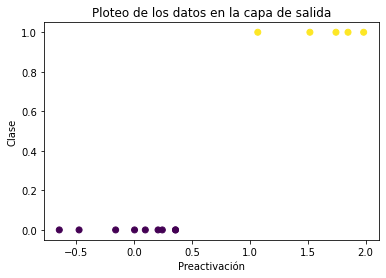

In [12]:
#Visualización regresión capa de salida
plt.scatter(dot[:,1],Y,c=Y)
plt.title('Ploteo de los datos en la capa de salida')
plt.ylabel('Clase')
plt.xlabel('Preactivación')
plt.show()

Y también podemos ver cómo se comportan las probabilidades según las clases en esta neurona de salida.

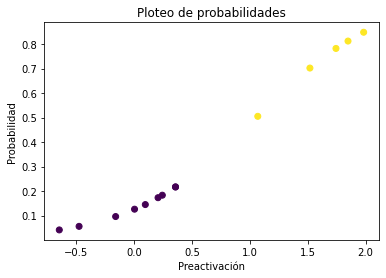

In [13]:
#Ploteo de probabilidades clase "gato"
plt.scatter(dot[:,1],probs[:,1],c=Y)
plt.title('Ploteo de probabilidades')
plt.ylabel('Probabilidad')
plt.xlabel('Preactivación')
plt.show()